In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from xgboost import plot_importance
from sklearn.ensemble import AdaBoostClassifier
from sklearn import metrics

train_data = pd.read_csv("../dataset/raw/KOI_train.csv")
# Make copies of dataset to preprocess data
train_data_preprocessed = train_data.copy()



C:\Users\chris\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [3]:
# Drop error tables
train_data_preprocessed.drop("koi_period_err1", inplace=True, axis=1)
train_data_preprocessed.drop("koi_period_err2", inplace=True, axis=1)
train_data_preprocessed.drop("koi_time0bk_err1", inplace=True, axis=1)
train_data_preprocessed.drop("koi_time0bk_err2", inplace=True, axis=1)
train_data_preprocessed.drop("koi_impact_err1", inplace=True, axis=1)
train_data_preprocessed.drop("koi_impact_err2", inplace=True, axis=1)
train_data_preprocessed.drop("koi_duration_err1", inplace=True, axis=1)
train_data_preprocessed.drop("koi_duration_err2", inplace=True, axis=1)
train_data_preprocessed.drop("koi_prad_err1", inplace=True, axis=1)
train_data_preprocessed.drop("koi_prad_err2", inplace=True, axis=1)
train_data_preprocessed.drop("koi_depth_err1", inplace=True, axis=1)
train_data_preprocessed.drop("koi_depth_err2", inplace=True, axis=1)
train_data_preprocessed.drop("koi_teq_err1", inplace=True, axis=1)
train_data_preprocessed.drop("koi_teq_err2", inplace=True, axis=1)
train_data_preprocessed.drop("koi_insol_err1", inplace=True, axis=1)
train_data_preprocessed.drop("koi_insol_err2", inplace=True, axis=1)
train_data_preprocessed.drop("koi_steff_err1", inplace=True, axis=1)
train_data_preprocessed.drop("koi_steff_err2", inplace=True, axis=1)
train_data_preprocessed.drop("koi_slogg_err1", inplace=True, axis=1)
train_data_preprocessed.drop("koi_slogg_err2", inplace=True, axis=1)
train_data_preprocessed.drop("koi_srad_err1", inplace=True, axis=1)
train_data_preprocessed.drop("koi_srad_err2", inplace=True, axis=1)

# Basic data info
describe = train_data_preprocessed.describe()
train_data_preprocessed.info()
train_data_preprocessed.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9564 entries, 0 to 9563
Data columns (total 28 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   rowid              9564 non-null   int64  
 1   kepid              9564 non-null   int64  
 2   kepoi_name         9564 non-null   object 
 3   kepler_name        2294 non-null   object 
 4   koi_disposition    9564 non-null   object 
 5   koi_pdisposition   9564 non-null   object 
 6   koi_score          8054 non-null   float64
 7   koi_fpflag_nt      9564 non-null   int64  
 8   koi_fpflag_ss      9564 non-null   int64  
 9   koi_fpflag_co      9564 non-null   int64  
 10  koi_fpflag_ec      9564 non-null   int64  
 11  koi_period         9564 non-null   float64
 12  koi_time0bk        9564 non-null   float64
 13  koi_impact         9201 non-null   float64
 14  koi_duration       9564 non-null   float64
 15  koi_depth          9201 non-null   float64
 16  koi_prad           9201 

rowid                   0
kepid                   0
kepoi_name              0
kepler_name          7270
koi_disposition         0
koi_pdisposition        0
koi_score            1510
koi_fpflag_nt           0
koi_fpflag_ss           0
koi_fpflag_co           0
koi_fpflag_ec           0
koi_period              0
koi_time0bk             0
koi_impact            363
koi_duration            0
koi_depth             363
koi_prad              363
koi_teq               363
koi_insol             321
koi_model_snr         363
koi_tce_plnt_num      346
koi_tce_delivname     346
koi_steff             363
koi_slogg             363
koi_srad              363
ra                      0
dec                     0
koi_kepmag              1
dtype: int64

In [4]:
#PLAYGROUND TO BE REMOVED
print(train_data_preprocessed["koi_period"].mean())
train_data_preprocessed["koi_disposition"] = train_data_preprocessed["koi_disposition"].map({"CONFIRMED":1, "CANDIDATE":1, "FALSE POSITIVE":0})

confirmed = train_data_preprocessed[train_data_preprocessed.koi_disposition == 1]
period_conf = train_data_preprocessed.loc[train_data_preprocessed.koi_period <= 76]["koi_disposition"]
rate_period_conf = sum(period_conf)/len(confirmed)
print(train_data_preprocessed.koi_disposition.value_counts())
print(rate_period_conf)
print(train_data_preprocessed[train_data_preprocessed.koi_period >= 76].value_counts())
print(f"Period median: {train_data_preprocessed.koi_period.median()}")

75.67135842482392
0    5023
1    4541
Name: koi_disposition, dtype: int64
0.8491521691257432
rowid  kepid     kepoi_name  kepler_name    koi_disposition  koi_pdisposition  koi_score  koi_fpflag_nt  koi_fpflag_ss  koi_fpflag_co  koi_fpflag_ec  koi_period  koi_time0bk  koi_impact  koi_duration  koi_depth  koi_prad  koi_teq  koi_insol  koi_model_snr  koi_tce_plnt_num  koi_tce_delivname  koi_steff  koi_slogg  koi_srad  ra         dec        koi_kepmag
37     11018648  K00759.02   Kepler-230 c   1                CANDIDATE         0.978      0              0              0              0              91.773286   193.83780    0.606       6.473         652.0      2.12      359.0    3.92       19.1           2.0               q1_q17_dr25_tce    5586.0     4.560      0.798     285.71854  48.505859  15.082        1
4668   11757451  K04745.01   Kepler-443 b   1                CANDIDATE         0.877      0              0              0              0              177.668663  264.24280    0.772    

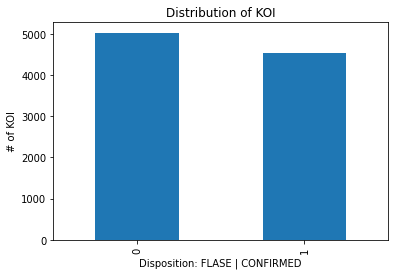

0    5023
1    4541
Name: koi_disposition, dtype: int64


Text(0.5, 1.0, 'Distribution of the koi_period')

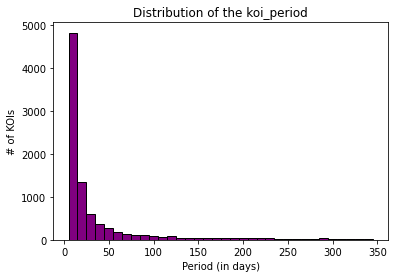

In [5]:
# HISTOGRAMS
train_data_preprocessed.koi_disposition.value_counts().plot(kind="bar")
plt.xlabel("Disposition: FLASE | CONFIRMED")
plt.ylabel("# of KOI")
plt.title("Distribution of KOI")
plt.show()
print(train_data_preprocessed.koi_disposition.value_counts())

plt.hist(train_data_preprocessed["koi_period"], bins=range(0, 350, 10), align="right", color="purple", edgecolor="black")
plt.xlabel("Period (in days)")
plt.ylabel("# of KOIs")
plt.title("Distribution of the koi_period")



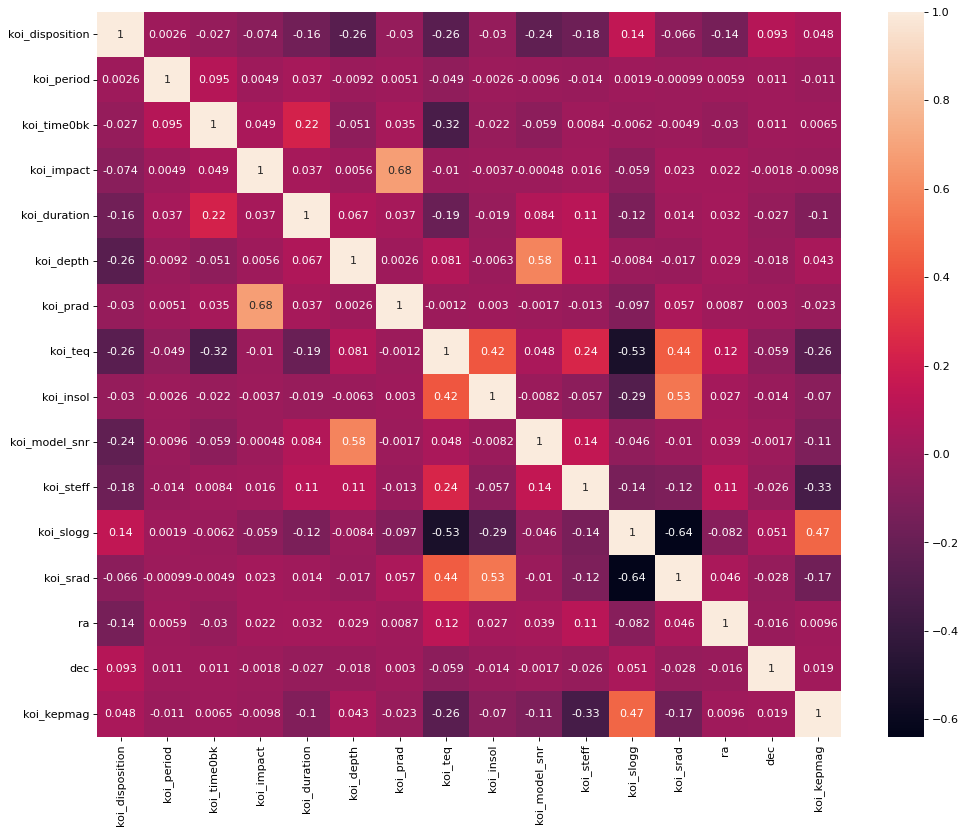

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9200 entries, 0 to 9563
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   koi_disposition  9200 non-null   float64
 1   koi_period       9200 non-null   float64
 2   koi_time0bk      9200 non-null   float64
 3   koi_impact       9200 non-null   float64
 4   koi_duration     9200 non-null   float64
 5   koi_depth        9200 non-null   float64
 6   koi_prad         9200 non-null   float64
 7   koi_teq          9200 non-null   float64
 8   koi_insol        9200 non-null   float64
 9   koi_model_snr    9200 non-null   float64
 10  koi_steff        9200 non-null   float64
 11  koi_slogg        9200 non-null   float64
 12  koi_srad         9200 non-null   float64
 13  ra               9200 non-null   float64
 14  dec              9200 non-null   float64
 15  koi_kepmag       9200 non-null   float64
dtypes: float64(16)
memory usage: 1.2 MB


In [6]:
# CORRELATION MATRIX
train_data_preprocessed.drop("kepoi_name", inplace=True, axis=1)
train_data_preprocessed.drop("kepler_name", inplace=True, axis=1)
train_data_preprocessed.drop("kepid", inplace=True, axis=1)
train_data_preprocessed.drop("rowid", inplace=True, axis=1)
train_data_preprocessed.drop("koi_pdisposition", inplace=True, axis=1)
train_data_preprocessed.drop("koi_score", inplace=True, axis=1)
train_data_preprocessed.drop("koi_tce_delivname", inplace=True, axis=1)
train_data_preprocessed.drop("koi_tce_plnt_num", inplace=True, axis=1)
train_data_preprocessed.drop("koi_fpflag_nt", inplace=True, axis=1)
train_data_preprocessed.drop("koi_fpflag_ss", inplace=True, axis=1)
train_data_preprocessed.drop("koi_fpflag_co", inplace=True, axis=1)
train_data_preprocessed.drop("koi_fpflag_ec", inplace=True, axis=1)
train_data_preprocessed.dropna(subset= ["koi_prad"], inplace=True)
train_data_preprocessed.dropna(subset= ["koi_kepmag"], inplace=True)

#normalize values in every column
train_data_preprocessed = (train_data_preprocessed-train_data_preprocessed.min())/(train_data_preprocessed.max() - train_data_preprocessed.min())
plt.figure(figsize=(15, 12), dpi=80)
corrMatrix = train_data_preprocessed.corr()
sn.heatmap(corrMatrix, annot=True)
plt.show()
train_data_preprocessed.info()

In [7]:
# Selected features and label
features = train_data_preprocessed.drop("koi_disposition", axis=1)
label = train_data_preprocessed["koi_disposition"]
# Create and train Random Forest
rf = RandomForestClassifier()
rf = RandomForestClassifier(n_estimators=100, criterion = "gini", max_depth=2)
rf.fit(features, label)
print("accuracy score Random Forest:", rf.score(features, label))
# Start the 5 fold cross validation process on the DT and calculate the mean of the accuracy
rf_scores = cross_val_score(rf, X=features, y=label, cv=5)
print("5 fold CV Random Forest accuracy scores:", rf_scores)
print("5 fold CV Random Forest mean accuracy:", np.mean(rf_scores))

accuracy score Random Forest: 0.7634782608695653
5 fold CV Random Forest accuracy scores: [0.77336957 0.78804348 0.68695652 0.81413043 0.73586957]
5 fold CV Random Forest mean accuracy: 0.7596739130434782


In [7]:
# Create and train decision tree
dt = DecisionTreeClassifier()
dt = DecisionTreeClassifier(criterion = "gini", splitter="best", max_depth=2)
dt = dt.fit(features, label)
print("accuracy score (max-depth = 2):", dt.score(features, label)) 
dt_scores = cross_val_score(dt, X=features, y=label, cv=5)
print("5 fold CV DT accuracy scores:", dt_scores)
print("5 fold DTt mean accuracy:", np.mean(dt_scores))

accuracy score (max-depth = 2): 0.764891304347826
5 fold CV DT accuracy scores: [0.7798913  0.78641304 0.68695652 0.81684783 0.7375    ]
5 fold DTt mean accuracy: 0.7615217391304346


In [8]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 15, metric = "minkowski", p = 1, algorithm="ball_tree")
classifier_scores = cross_val_score(classifier, X=features, y=label, cv=5)
print("5 fold CV KNN accuracy scores:", classifier_scores)
print("5 fold CV KNN mean accuracy:", np.mean(classifier_scores))

5 fold CV KNN accuracy scores: [0.67228261 0.76467391 0.67880435 0.75543478 0.6951087 ]
5 fold CV KNN mean accuracy: 0.7132608695652174


In [9]:
# Note: At this point I will separate the data in different ways
# 1st: 75/25 split of of KOI data, 75 for training and 25 for testing
# 2nd: I"m bringing in data from the TESS project ad the test data and using the full KOI data as the training. 
#      TESS is Kepler"s replacement, but the data doesn"t align perfectly with the KOI data so I have to delete the following features from KOI:
#      koi_time0bk, koi_impact and koi_model_snr, ra and dec
#      Delete following features from TESS:

from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn import metrics

features_train, features_test, label_train, label_test = train_test_split(features, label, test_size=0.25, random_state=2)

ada_weak_model = RandomForestClassifier(n_estimators=100, criterion = "gini", max_depth=5)
AdaBoost = AdaBoostClassifier(base_estimator=ada_weak_model, n_estimators=400, learning_rate=0.10)
boostmodel = AdaBoost.fit(features_train, label_train)
# Evaluate the accuracy of the model
label_pred = boostmodel.predict(features_test)


The accuracy is:  0.8521739130434782


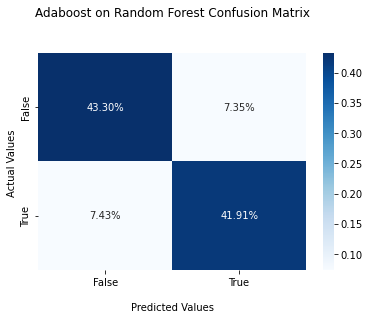

In [10]:
# Use metrics for accuracy and confusion matrix
predictions = metrics.accuracy_score(label_test, label_pred)
cf_matrix = metrics.confusion_matrix(label_test, label_pred)
print("The accuracy is: ", predictions)

# plot confusion matrix
matrix = sn.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, fmt=".2%", cmap="Blues")
matrix.set_title("Adaboost on Random Forest Confusion Matrix\n\n")
matrix.set_xlabel("\nPredicted Values")
matrix.set_ylabel("Actual Values ")
matrix.xaxis.set_ticklabels(["False","True"])
matrix.yaxis.set_ticklabels(["False","True"])
plt.show()

C:\Users\chris\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\chris\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\chris\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCac

[17:19:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
The accuracy is:  0.8491304347826087
[0. 0. 1. ... 1. 1. 1.]


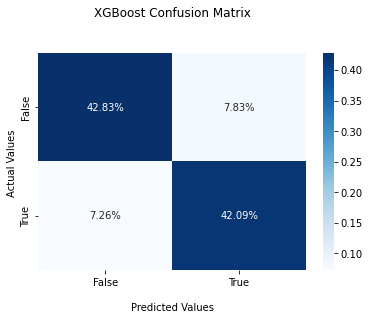

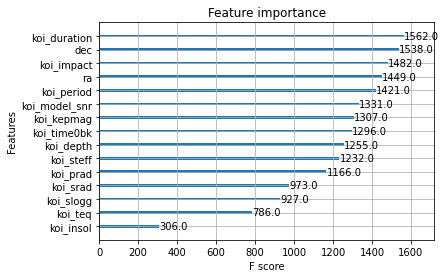

In [11]:
# TEST WITH XGBOOST
from xgboost import XGBClassifier
from xgboost import plot_importance

features_train, features_test, label_train, label_test = train_test_split(features, label, test_size=0.25, random_state=1)

xgboost = XGBClassifier(n_estimators=1000, learning_rate=0.15, max_depth=5)
xgboost.fit(features_train, label_train)

label_pred = xgboost.predict(features_test)
# Use metrics for accuracy and confusion matrix
predictions = metrics.accuracy_score(label_test, label_pred)
cf_matrix = metrics.confusion_matrix(label_test, label_pred)
print("The accuracy is: ", predictions)
print(label_pred)

# plot confusion matrix
matrix = sn.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, fmt=".2%", cmap="Blues")
matrix.set_title("XGBoost Confusion Matrix\n\n")
matrix.set_xlabel("\nPredicted Values")
matrix.set_ylabel("Actual Values ")
matrix.xaxis.set_ticklabels(["False","True"])
matrix.yaxis.set_ticklabels(["False","True"])
plt.show()

plot_importance(xgboost)
plt.show()



The accuracy is:  0.85


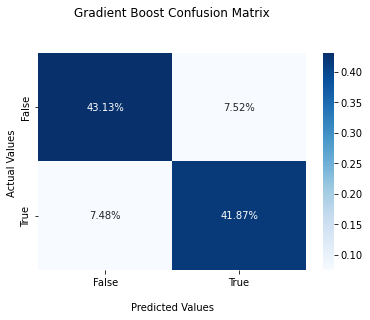

In [12]:
from sklearn.ensemble import GradientBoostingClassifier 

features_train, features_test, label_train, label_test = train_test_split(features, label, test_size=0.25, random_state=1)

gradient = GradientBoostingClassifier(n_estimators=1000, learning_rate=0.2, max_depth=5)
gradient.fit(features_train, label_train)

label_pred = gradient.predict(features_test)
# Use metrics for accuracy and confusion matrix
predictions = metrics.accuracy_score(label_test, label_pred)
cf_matrix = metrics.confusion_matrix(label_test, label_pred)
print("The accuracy is: ", predictions)

# plot confusion matrix
matrix = sn.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, fmt=".2%", cmap="Blues")
matrix.set_title("Gradient Boost Confusion Matrix\n\n")
matrix.set_xlabel("\nPredicted Values")
matrix.set_ylabel("Actual Values ")
matrix.xaxis.set_ticklabels(["False","True"])
matrix.yaxis.set_ticklabels(["False","True"])
plt.show()

In [ ]:
# Test with DT as weak learner for adaboost
from sklearn import svm

features_train, features_test, label_train, label_test = train_test_split(features, label, test_size=0.20, random_state=1)

ada_tree_model = DecisionTreeClassifier(criterion = "entropy", max_depth=5, splitter="random")
AdaBoost = AdaBoostClassifier(base_estimator=ada_tree_model, n_estimators=2000, learning_rate=0.04)
AdaBoost.fit(features_train, label_train)
# Evaluate the accuracy of the model
label_pred = AdaBoost.predict(features_test)

In [ ]:
# Use metrics for accuracy and confusion matrix
predictions = metrics.accuracy_score(label_test, label_pred)
cf_matrix = metrics.confusion_matrix(label_test, label_pred)
print("The accuracy is: ", predictions)

# plot confusion matrix
matrix = sn.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, fmt=".2%", cmap="Blues")
matrix.set_title("Adaboost on DT (entropy, depth=5) Confusion Matrix\n\n")
matrix.set_xlabel("\nPredicted Values")
matrix.set_ylabel("Actual Values ")
matrix.xaxis.set_ticklabels(["False","True"])
matrix.yaxis.set_ticklabels(["False","True"])
plt.show()

In [21]:
def decisionTreeAcc(depth, rate, estimators):
    '''This function is used to help fine tune the decision tree model for adaboost
    '''
    features_train, features_test, label_train, label_test = train_test_split(features, label, test_size=0.25, random_state=1)
    ada_tree_model = DecisionTreeClassifier(criterion = "entropy", max_depth=depth, splitter="random")
    AdaBoost = AdaBoostClassifier(base_estimator=ada_tree_model, n_estimators=estimators, learning_rate=rate)
    AdaBoost.fit(features_train, label_train)
    # Evaluate the accuracy of the model
    label_pred = AdaBoost.predict(features_test)
    predictions = metrics.accuracy_score(label_test, label_pred)
    return predictions

In [22]:
def xgboostAcc(depth, rate, estimators):
    '''This function is used to help fine tune the xgboost model
    '''
    features_train, features_test, label_train, label_test = train_test_split(features, label, test_size=0.25, random_state=1)
    xgboost = XGBClassifier(n_estimators=estimators, learning_rate=rate, max_depth=depth)
    xgboost.fit(features_train, label_train)
    label_pred = xgboost.predict(features_test)
    # Use metrics for accuracy and confusion matrix
    predictions = metrics.accuracy_score(label_test, label_pred)
    return predictions

In [23]:
def randomForestAcc(depth, rate, estimators):
    '''This function is used to help fine tune the random forest model for adaboost
    '''
    features_train, features_test, label_train, label_test = train_test_split(features, label, test_size=0.25, random_state=1)
    ada_weak_model = RandomForestClassifier(n_estimators=100, criterion = "gini", max_depth=depth)
    AdaBoost = AdaBoostClassifier(base_estimator=ada_weak_model, n_estimators=estimators, learning_rate=rate)
    boostmodel = AdaBoost.fit(features_train, label_train)
    # Evaluate the accuracy of the model
    label_pred = boostmodel.predict(features_test)
    # Use metrics for accuracy and confusion matrix
    predictions = metrics.accuracy_score(label_test, label_pred)
    return predictions

In [24]:
def dtPred(depth: int, rate: float, estimators: int, file: str):
    ''' This function makes predictions on test data using Decision tree with entropy for Adaboost.\n
        Parameters:
            - depth: maximum tree depth for decision tree
            - rate: Learning rate for adaboost learners
            - estimators: Number of estimators for adaboost 
            - file: path to file in which the prediction will be saved\n
        Note: This function requires train.csv and test.csv to exist in "../dataset/preprocessed/" directory
    '''
    # Load the training and testing data
    train = pd.read_csv("../dataset/preprocessed/train.csv")
    test = pd.read_csv("../dataset/preprocessed/test.csv")
    features_train = train.drop("koi_disposition", axis=1)
    label_train = train["koi_disposition"]    
        
    # Define and train model 
    ada_tree_model = DecisionTreeClassifier(criterion = "entropy", max_depth=depth, splitter="best")
    AdaBoost = AdaBoostClassifier(base_estimator=ada_tree_model, n_estimators=estimators, learning_rate=rate)
    boostmodel = AdaBoost.fit(features_train, label_train)
    
    # Make prediction and save output to file
    prediction = boostmodel.predict(test)
    output = pd.DataFrame({'index': test.index, 'koi_disposition': prediction})
    output.to_csv(file, index=False)

In [25]:
def xgboostPred(depth: int, rate: float, estimators: int, file: str):
    ''' This function makes predictions on test data using XGBoost.\n
        Parameters:
            - depth: maximum depth for xgboost
            - rate: Learning rate for xgboost learners
            - estimators: Number of estimators for xgboost  
            - file: path to file in which the prediction will be saved\n
        Note: This function requires train.csv and test.csv to exist in "../dataset/preprocessed/" directory
    '''
    # Load the training and testing data
    train = pd.read_csv("../dataset/preprocessed/train.csv")
    test = pd.read_csv("../dataset/preprocessed/test.csv")
    features_train = train.drop("koi_disposition", axis=1)
    label_train = train["koi_disposition"]
    
    # Define and train model 
    xgboost = XGBClassifier(n_estimators=estimators, learning_rate=rate, max_depth=depth)
    boostmodel = xgboost.fit(features_train, label_train)
    
    # Make prediction and save output to file
    prediction = boostmodel.predict(test)
    output = pd.DataFrame({'index': test.index, 'koi_disposition': prediction})
    output.to_csv(file, index=False)

In [26]:
def rfPred(depth: int, rate: float, estimators: int, file: str):
    ''' This function makes predictions on test data using Random Forest for Adaboost.\n
        Parameters:
            - depth: maximum tree depth for random forest
            - rate: Learning rate for adaboost learners
            - estimators: Number of estimators for adaboost 
            - file: path to file in which the prediction will be saved\n
        Note: This function requires train.csv and test.csv to exist in "../dataset/preprocessed/" directory
    '''
    # Load the training and testing data
    train = pd.read_csv("../dataset/preprocessed/train.csv")
    test = pd.read_csv("../dataset/preprocessed/test.csv")
    features_train = train.drop("koi_disposition", axis=1)
    label_train = train["koi_disposition"]

    # Define and train model 
    ada_weak_model = RandomForestClassifier(n_estimators=100, criterion = "gini", max_depth=depth)
    AdaBoost = AdaBoostClassifier(base_estimator=ada_weak_model, n_estimators=estimators, learning_rate=rate)
    boostmodel = AdaBoost.fit(features_train, label_train)
    
    # Make prediction and save output to file
    prediction = boostmodel.predict(test)
    output = pd.DataFrame({'index': test.index, 'koi_disposition': prediction})
    output.to_csv(file, index=False)

In [27]:
def accuracyTotal(iterations, model, depth, rate, estimators):
    predictions = 0
    if model == "tree":
        for i in range(iterations):
            predictions = predictions+decisionTreeAcc(depth, rate, estimators)
    elif model == "forest":
        for i in range(iterations):
            predictions = predictions+randomForestAcc(depth, rate, estimators)
    elif model == "xgboost":
        for i in range(iterations):
            predictions = predictions+xgboostAcc(depth, rate, estimators)
    predictions = predictions/iterations
    print(f"The accuracy for {iterations} run  of {model} is: {predictions}")


In [28]:
def makePredictions(iterations, model, depth, rate, estimators):
    filePath = ""
    if model == "tree":
        for i in range(iterations):
            filePath = f"../dataset/preprocessed/AdaDt/{i}.csv"
            dtPred(depth, rate, estimators, filePath)
    elif model == "forest":
        for i in range(iterations):
            filePath = f"../dataset/preprocessed/AdaRf/{i}.csv"
            rfPred(depth, rate, estimators, filePath)
    elif model == "xgboost":
        for i in range(iterations):
            filePath = f"../dataset/preprocessed/XGBoost/{i}.csv"
            xgboostPred(depth, rate, estimators, filePath)


In [29]:
def createSplit(dataframe: pd.DataFrame, split_test_size: float, rand: int, location: str):
    train, test = train_test_split(dataframe, test_size=split_test_size, random_state=rand)
    train.to_csv(f"{location}/train.csv", index=False)
    test_solution = pd.DataFrame({'index': range(0, len(test)), 'koi_disposition': test.koi_disposition})
    test_solution.to_csv(f"{location}/test_solution.csv", index=False)
    test_data = test.drop("koi_disposition", axis=1)
    test_data.to_csv(f"{location}/test.csv", index=False)


In [ ]:
def makeModelVote(file_path: str, file_number: int, entries: int):
    voting_dict = dict()
    for i in range(0, entries):
        voting_dict[i] = list()
    for i in range(0, file_number):
        filepath=f"{file_path}/{i}.csv"
        current_pred = pd.read_csv(filepath)
        for id, row in current_pred.iterrows():
            voting_dict[id].append(row["koi_disposition"])

    # Vote base on majority choice
    for i in range(0, entries):
        confirmed = 0
        false = 0
        for result in voting_dict[i]:
            if result == 1.0:
                confirmed += 1
            else:
                false += 1
        if confirmed > false:
            voting_dict[i] = 1.0
        else:
            voting_dict[i] = 0.0

    # save final prediction
    final_pred = dict()
    final_pred["index"] = list()
    final_pred["koi_disposition"] = list()
    for i in voting_dict:
        final_pred["index"].append(i)
        final_pred["koi_disposition"].append(voting_dict[i])

    pred = pd.DataFrame(final_pred)
    pred.to_csv(f"{file_path}/final.csv", index=False)

    pred = pd.read_csv(f"{file_path}/final.csv")
    sol = pd.read_csv("../dataset/preprocessed/test_solution.csv")
    score = 0
    for id, row in sol.iterrows():
        # ensure that indexes match
        if row["index"] == pred.loc[id, "index"]:
            if row["koi_disposition"] == pred.loc[id, "koi_disposition"]:
                score += 1
    print(score)
    print(score/len(sol["index"]))

In [32]:
train_data_preprocessed.drop("koi_insol", axis=1)
createSplit(train_data_preprocessed, 0.3, 30, "../dataset/preprocessed")

makePredictions(15, "tree", 6, 0.05, 2000)
makePredictions(3, "forest", 6, 0.08, 600)
makePredictions(9, "xgboost", 6, 0.04, 2500)

makeModelVote("../dataset/preprocessed/AdaDt", 15, 2300)
makeModelVote("../dataset/preprocessed/AdaRf", 3, 2300)
makeModelVote("../dataset/preprocessed/XGBoost", 9, 2300)


KeyboardInterrupt: 

In [ ]:
# ADA VOTE TEST
#sol = pd.read_csv("../dataset/preprocessed/test_solution.csv")

# Create and populate temporar voting dict
voting_dict = dict()
for i in range(0, 2300):
    voting_dict[i] = list()
for i in range(0, 15):
    filepath=f"../dataset/preprocessed/AdaDt/{i}.csv"
    current_pred = pd.read_csv(filepath)
    for id, row in current_pred.iterrows():
        voting_dict[id].append(row["koi_disposition"])

# Vote base on majority choice
for i in range(0, 2300):
    confirmed = 0
    false = 0
    for result in voting_dict[i]:
        if result == 1.0:
            confirmed += 1
        else:
            false += 1
    if confirmed > false:
        voting_dict[i] = 1.0
    else:
        voting_dict[i] = 0.0

# save final prediction
final_pred = dict()
final_pred["index"] = list()
final_pred["koi_disposition"] = list()
for i in voting_dict:
    final_pred["index"].append(i)
    final_pred["koi_disposition"].append(voting_dict[i])

pred = pd.DataFrame(final_pred)
pred.to_csv("../dataset/preprocessed/AdaDt/final.csv", index=False)
    

    

In [ ]:
# ADA VOTE TEST
#sol = pd.read_csv("../dataset/preprocessed/test_solution.csv")

# Create and populate temporar voting dict
voting_dict = dict()
for i in range(0, 2300):
    voting_dict[i] = list()
for i in range(0, 3):
    filepath=f"../dataset/preprocessed/AdaRf/{i}.csv"
    current_pred = pd.read_csv(filepath)
    for id, row in current_pred.iterrows():
        voting_dict[id].append(row["koi_disposition"])

# Vote base on majority choice
for i in range(0, 2300):
    confirmed = 0
    false = 0
    for result in voting_dict[i]:
        if result == 1.0:
            confirmed += 1
        else:
            false += 1
    if confirmed > false:
        voting_dict[i] = 1.0
    else:
        voting_dict[i] = 0.0

# save final prediction
final_pred = dict()
final_pred["index"] = list()
final_pred["koi_disposition"] = list()
for i in voting_dict:
    final_pred["index"].append(i)
    final_pred["koi_disposition"].append(voting_dict[i])

pred = pd.DataFrame(final_pred)
pred.to_csv("../dataset/preprocessed/AdaRf/final.csv", index=False)

In [ ]:
# ADA VOTE TEST
#sol = pd.read_csv("../dataset/preprocessed/test_solution.csv")

# Create and populate temporar voting dict
voting_dict = dict()
for i in range(0, 2300):
    voting_dict[i] = list()
for i in range(0, 9):
    filepath=f"../dataset/preprocessed/XGBoost/{i}.csv"
    current_pred = pd.read_csv(filepath)
    for id, row in current_pred.iterrows():
        voting_dict[id].append(row["koi_disposition"])

# Vote base on majority choice
for i in range(0, 2300):
    confirmed = 0
    false = 0
    for result in voting_dict[i]:
        if result == 1.0:
            confirmed += 1
        else:
            false += 1
    if confirmed > false:
        voting_dict[i] = 1.0
    else:
        voting_dict[i] = 0.0

# save final prediction
final_pred = dict()
final_pred["index"] = list()
final_pred["koi_disposition"] = list()
for i in voting_dict:
    final_pred["index"].append(i)
    final_pred["koi_disposition"].append(voting_dict[i])

pred = pd.DataFrame(final_pred)
pred.to_csv("../dataset/preprocessed/XGBoost/final.csv", index=False)

In [ ]:
# POSSIBLE IDEA: SAVE PRED FROM ADA, XGBOOST AND GRADIENT SEPARETELY AND VOTE TO SEE IF IT INCREASES ACCURACY
#
# Step 1: Split train and test data manually so all boosting algorithms get the same data
# Step 2: 
#

tess_data = pd.read_csv("../dataset/raw/TOI_test.csv")
# Make copies of dataset to preprocess data
tess_data_preprocessed = tess_data.copy()

In [ ]:
pred = pd.read_csv("../dataset/preprocessed/AdaDt/final.csv")
sol = pd.read_csv("../dataset/preprocessed/test_solution.csv")
score = 0
for id, row in sol.iterrows():
    # ensure that indexes match
    if row["index"] == pred.loc[id, "index"]:
        if row["koi_disposition"] == pred.loc[id, "koi_disposition"]:
            score += 1
print(score)
print(score/len(sol["index"]))

pred = pd.read_csv("../dataset/preprocessed/AdaRf/final.csv")
sol = pd.read_csv("../dataset/preprocessed/test_solution.csv")
score = 0
for id, row in sol.iterrows():
    # ensure that indexes match
    if row["index"] == pred.loc[id, "index"]:
        if row["koi_disposition"] == pred.loc[id, "koi_disposition"]:
            score += 1
print(score)
print(score/len(sol["index"]))

pred = pd.read_csv("../dataset/preprocessed/XGBoost/final.csv")
sol = pd.read_csv("../dataset/preprocessed/test_solution.csv")
score = 0
for id, row in sol.iterrows():
    # ensure that indexes match
    if row["index"] == pred.loc[id, "index"]:
        if row["koi_disposition"] == pred.loc[id, "koi_disposition"]:
            score += 1
print(score)
print(score/len(sol["index"]))




1534
0.8336956521739131
1564
0.85
1547
0.8407608695652173
